<a href="https://colab.research.google.com/github/satishchaudhary382/satish/blob/master/stock%20trading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [0]:
df = pd.read_csv("/content/nic.txt", sep='\t', parse_dates=['Date'])

In [208]:
df

,Date,Open,High,Low,Close,Volume
0,2019-03-24,393,399,393,396,11361
1,2019-03-25,394,400,394,398,8113
2,2019-03-26,398,400,395,398,15558
3,2019-03-27,400,400,397,398,13921
4,2019-03-28,403,403,396,398,15408
...,...,...,...,...,...,...
240,2020-03-15,545,547,518,518,215664
241,2020-03-16,518,531,511,522,246391
242,2020-03-17,522,522,501,508,197047
243,2020-03-18,511,518,491,502,166700


In [0]:
def abcd(trend, skip_loop = 4, ma = 20):
    ma = pd.Series(trend).rolling(ma).mean().values
    x = []
    for a in range(ma.shape[0]):
        for b in range(a, ma.shape[0], skip_loop):
            for c in range(b, ma.shape[0], skip_loop):
                for d in range(c, ma.shape[0], skip_loop):
                    if ma[b] > ma[a] and \
                    (ma[c] < ma[b] and ma[c] > ma[a]) \
                    and ma[d] > ma[b]:
                        x.append([a,b,c,d])
    x_np = np.array(x)
    ac = x_np[:,0].tolist() + x_np[:,2].tolist()
    bd = x_np[:,1].tolist() + x_np[:,3].tolist()
    ac_set = set(ac)
    bd_set = set(bd)
    signal = np.zeros(len(trend))
    buy = list(ac_set - bd_set)
    sell = list(list(bd_set - ac_set))
    signal[buy] = 1.0
    signal[sell] = -1.0
    return signal

In [0]:
data = df
data['ma'] = data['Close'].rolling(7).mean()
data['ma2'] = data['Close'].rolling(20).mean()

def a(data):
  if (data['Close'] < data['ma'] ) and (data['Close'] < data['ma']):
    return 1
  elif (data['Close'] > data['ma'] ) and (data['Close'] > data['ma']):
    return -1
  else:
    return 0

In [0]:
data['Result'] = data.apply(a,axis=1)

#u = []
#if (data['Close'][35])<(data['ma'][35]) & (data['Close'][35])<(data['ma2'][35]) :
#  u.append(1)
#elif (data['Close'][35]>data['ma'][35]) and (data['Close'][35]>data['ma2'][35]):
#  u.append(-1)
#else:
#  u.append(0)


In [0]:
s = np.array(data['Result'])

In [175]:
%%time
signal = abcd(df['Close'])

CPU times: user 1.03 s, sys: 4.54 ms, total: 1.03 s
Wall time: 1.04 s


In [176]:
signal

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1., -1., -1., -1., -1.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
        0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

In [0]:
def buy_stock(
    real_movement,
    signal,
    initial_money = 25000,
    max_buy = 10,
    max_sell = 10,
):
    """
    real_movement = actual movement in the real world
    delay = how much interval you want to delay to change our decision from buy to sell, vice versa
    initial_state = 1 is buy, 0 is sell
    initial_money = 10000, ignore what kind of currency
    max_buy = max quantity for share to buy
    max_sell = max quantity for share to sell
    """
    starting_money = initial_money
    states_sell = []
    states_buy = []
    states_money = []
    current_inventory = 0
    
    def buy(i, initial_money, current_inventory):
        shares = initial_money // real_movement[i]
        if shares < 1:
            print(
                'day %d: total balances %f, not enough money to buy a unit price %f'
                % (i, initial_money, real_movement[i])
            )
        else:
            if shares > max_buy:
                buy_units = max_buy
            else:
                buy_units = shares
            initial_money -= buy_units * real_movement[i]
            current_inventory += buy_units
            print(
                'day %d: buy %d units at price %f, total balance %f'
                % (i, buy_units, buy_units * real_movement[i], initial_money)
            )
            states_buy.append(0)
        return initial_money, current_inventory
    
    for i in range(real_movement.shape[0]):
        state = signal[i]
        if state == 1:
            initial_money, current_inventory = buy(
                i, initial_money, current_inventory
            )
            states_buy.append(i)
        elif state == -1:
            if current_inventory == 0:
                    print('day %d: cannot sell anything, inventory 0' % (i))
            else:
                if current_inventory > max_sell:
                    sell_units = max_sell
                else:
                    sell_units = current_inventory
                current_inventory -= sell_units
                total_sell = sell_units * real_movement[i]
                initial_money += total_sell
                try:
                    invest = (
                        (real_movement[i] - real_movement[states_buy[-1]])
                        / real_movement[states_buy[-1]]
                    ) * 100
                except:
                    invest = 0
                print(
                    'day %d, sell %d units at price %f, investment %f %%, total balance %f,'
                    % (i, sell_units, total_sell, invest, initial_money)
                )
            states_sell.append(i)
        states_money.append(initial_money)
            
    invest = ((initial_money - starting_money) / starting_money) * 100
    total_gains = initial_money - starting_money
    return states_buy, states_sell, total_gains, invest, states_money

In [188]:
states_buy, states_sell, total_gains, invest, states_money = buy_stock(df.Close, signal)


day 19: buy 10 units at price 4940.000000, total balance 20060.000000
day 20: buy 10 units at price 4840.000000, total balance 15220.000000
day 21: buy 10 units at price 4900.000000, total balance 10320.000000
day 22: buy 10 units at price 5060.000000, total balance 5260.000000
day 34, sell 10 units at price 4870.000000, investment -3.754941 %, total balance 10130.000000,
day 35, sell 10 units at price 4930.000000, investment -2.569170 %, total balance 15060.000000,
day 36, sell 10 units at price 4910.000000, investment -2.964427 %, total balance 19970.000000,
day 37, sell 10 units at price 4900.000000, investment -3.162055 %, total balance 24870.000000,
day 38: cannot sell anything, inventory 0
day 82: buy 10 units at price 4630.000000, total balance 20240.000000
day 86: buy 10 units at price 4590.000000, total balance 15650.000000
day 109: buy 10 units at price 4390.000000, total balance 11260.000000
day 116: buy 10 units at price 4480.000000, total balance 6780.000000
day 120: buy 1

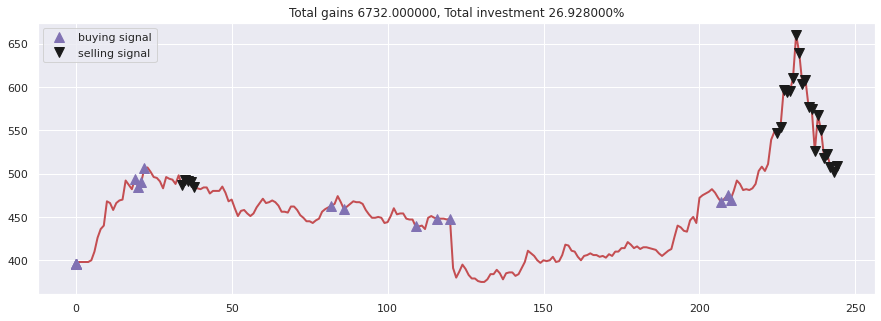

In [189]:
close = df['Close']
fig = plt.figure(figsize = (15,5))
plt.plot(close, color='r', lw=2.)
plt.plot(close, '^', markersize=10, color='m', label = 'buying signal', markevery = states_buy)
plt.plot(close, 'v', markersize=10, color='k', label = 'selling signal', markevery = states_sell)
plt.title('Total gains %f, Total investment %f%%'%(total_gains, invest))
plt.legend()
plt.show()

Moving average


In [0]:
short_window = 10#int(0.025 * len(df))
long_window = 14#int(0.05 * len(df))

signals = pd.DataFrame(index=df.index)
signals['signal'] = 0.0

signals['short_ma'] = df['Close'].rolling(window=short_window, min_periods=1, center=False).mean()
signals['long_ma'] = df['Close'].rolling(window=long_window, min_periods=1, center=False).mean()

signals['signal'][short_window:] = np.where(signals['short_ma'][short_window:] 
                                            > signals['long_ma'][short_window:], 1.0, 0.0)   
signals['positions'] = signals['signal'].diff()

s = np.array(signals['positions'])

In [0]:
def buy_stock(
    real_movement,
    signal,
    initial_money = 25000,
    max_buy = 10,
    max_sell = 10,
):
    """
    real_movement = actual movement in the real world
    delay = how much interval you want to delay to change our decision from buy to sell, vice versa
    initial_state = 1 is buy, 0 is sell
    initial_money = 10000, ignore what kind of currency
    max_buy = max quantity for share to buy
    max_sell = max quantity for share to sell
    """
    starting_money = initial_money
    states_sell = []
    states_buy = []
    states_money = []
    current_inventory = 0
    
    def buy(i, initial_money, current_inventory):
        shares = initial_money // real_movement[i]
        if shares < 1:
            print(
                'day %d: total balances %f, not enough money to buy a unit price %f'
                % (i, initial_money, real_movement[i])
            )
        else:
            if shares > max_buy:
                buy_units = max_buy
            else:
                buy_units = shares
            initial_money -= buy_units * real_movement[i]
            current_inventory += buy_units
            print(
                'day %d: buy %d units at price %f, total balance %f'
                % (i, buy_units, buy_units * real_movement[i], initial_money)
            )
            states_buy.append(0)
        return initial_money, current_inventory
    
    for i in range(real_movement.shape[0]):
        state = signal[i]
        if state == 1:
            initial_money, current_inventory = buy(
                i, initial_money, current_inventory
            )
            states_buy.append(i)
        elif state == -1:
            if current_inventory == 0:
                    print('day %d: cannot sell anything, inventory 0' % (i))
            else:
                if current_inventory > max_sell:
                    sell_units = max_sell
                else:
                    sell_units = current_inventory
                current_inventory -= sell_units
                total_sell = sell_units * real_movement[i]
                initial_money += total_sell
                try:
                    invest = (
                        (real_movement[i] - real_movement[states_buy[-1]])
                        / real_movement[states_buy[-1]]
                    ) * 100
                except:
                    invest = 0
                print(
                    'day %d, sell %d units at price %f, investment %f %%, total balance %f,'
                    % (i, sell_units, total_sell, invest, initial_money)
                )
            states_sell.append(i)
        states_money.append(initial_money)
            
    invest = ((initial_money - starting_money) / starting_money) * 100
    return states_buy, states_sell, total_gains, invest, states_money

In [252]:
states_buy, states_sell, total_gains, invest, states_money = buy_stock(df.Close, s)


day 10: buy 10 units at price 4680.000000, total balance 20320.000000
day 33, sell 10 units at price 4980.000000, investment 6.410256 %, total balance 25300.000000,
day 38: buy 10 units at price 4840.000000, total balance 20460.000000
day 39, sell 10 units at price 4830.000000, investment -0.206612 %, total balance 25290.000000,
day 63: buy 10 units at price 4690.000000, total balance 20600.000000
day 70, sell 10 units at price 4620.000000, investment -1.492537 %, total balance 25220.000000,
day 84: buy 10 units at price 4740.000000, total balance 20480.000000
day 94, sell 10 units at price 4530.000000, investment -4.430380 %, total balance 25010.000000,
day 107: buy 10 units at price 4470.000000, total balance 20540.000000
day 112, sell 10 units at price 4360.000000, investment -2.460850 %, total balance 24900.000000,
day 119: buy 10 units at price 4470.000000, total balance 20430.000000
day 122, sell 10 units at price 3800.000000, investment -14.988814 %, total balance 24230.000000,


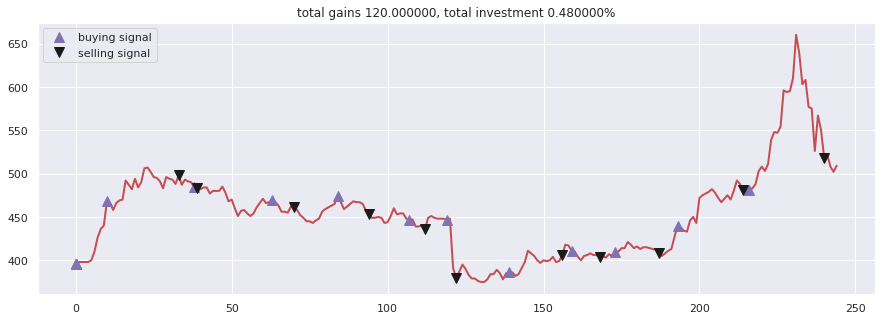

In [253]:
close = df['Close']
fig = plt.figure(figsize = (15,5))
plt.plot(close, color='r', lw=2.)
plt.plot(close, '^', markersize=10, color='m', label = 'buying signal', markevery = states_buy)
plt.plot(close, 'v', markersize=10, color='k', label = 'selling signal', markevery = states_sell)
plt.title('total gains %f, total investment %f%%'%(total_gains, invest))
plt.legend()
plt.show()

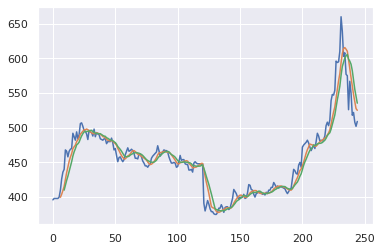

In [255]:
plt.plot(df['Close'])
plt.plot(df['Close'].rolling(7).mean())
plt.plot(df['Close'].rolling(10).mean())

Evolution strategy

In [0]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


In [554]:
nabil = pd.read_csv("/content/nabil.txt", sep='\t', parse_dates=['Date'])

############
# IMPORTATION #
###############
import sys
import operator
import numpy as np
import pandas as pd


def find_optimal_action(priceVec, transFeeRate, use_DP=True):
	
	_BUY = 1
	_HOLD = 0
	_SELL = -1

	dataLen = len(priceVec)
	actionVec = np.zeros(dataLen)

	# Dynamic Programming method
	if use_DP:
		capital = 1
		money = [{'money' : 0, 'from' : 0 } for _ in range(dataLen)]
		stock = [{'stock' : 0, 'from' : 1 } for _ in range(dataLen)]

		# DP initialization
		money[0]['money'] = capital
		stock[0]['stock'] = capital * (1 - transFeeRate) / priceVec[0]

		# DP recursion
		for t in range(1, dataLen):
			
			# find optimal for sell at time t:
			hold = money[t - 1]['money']
			sell = stock[t - 1]['stock'] * priceVec[t] * (1 - transFeeRate)

			if hold > sell:
				money[t]['money'] = hold
				money[t]['from'] = 0
			else:
				money[t]['money'] = sell
				money[t]['from'] = 1

			# find optimal for buy at time t:
			hold = stock[t - 1]['stock']
			buy = money[t - 1]['money'] * (1 - transFeeRate) / priceVec[t]

			if hold > buy:
				stock[t]['stock'] = hold
				stock[t]['from'] = 1
			else:
				stock[t]['stock'] = buy
				stock[t]['from'] = 0

		# must sell at T
		prev = 0
		actionVec[-1] = _SELL

		# DP trace back
		record = [money, stock]
		for t in reversed(range(1, dataLen)):
			prev = record[prev][t]['from']
			actionVec[t - 1] = _SELL if prev == 0 else _BUY
		
		# Action smoothing
		prevAction = actionVec[0]
		for t in range(1, dataLen):
			if actionVec[t] == prevAction:
				actionVec[t] = _HOLD
			elif actionVec[t] == -prevAction:
				prevAction = actionVec[t]

		return actionVec

	# Baseline method
	else:
		conCount = 3
		for ic in range(dataLen):
			if ic + conCount + 1 > dataLen:
				continue
			if all(x > 0 for x in list(map(operator.sub,priceVec[ic+1:ic+1+conCount], priceVec[ic:ic+conCount]))):
				actionVec[ic] = _BUY
			if all(x < 0 for x in list(map(operator.sub,priceVec[ic+1:ic+1+conCount], priceVec[ic:ic+conCount]))):
				actionVec[ic] = _SELL
		prevAction = _SELL

		for ic in range(dataLen):
			if actionVec[ic] == prevAction:
				actionVec[ic] = _HOLD
			elif actionVec[ic] == -prevAction:
				prevAction = actionVec[ic]
		return actionVec


def profit_estimate(priceVec, transFeeRate, actionVec):

	capital = 1
	capitalOrig = capital
	dataCount = len(priceVec)
	suggestedAction = actionVec
	
	stockHolding = np.zeros((dataCount))
	total = np.zeros((dataCount))
	
	total[0] = capital

	for ic in range(dataCount):
		currPrice = priceVec[ic]
		if ic > 0:
			stockHolding[ic] = stockHolding[ic-1]
		if suggestedAction[ic] == 1:
			if stockHolding[ic] == 0:            
				stockHolding[ic] = capital * (1 - transFeeRate) / currPrice
				capital = 0

		elif suggestedAction[ic] == -1:
			if stockHolding[ic] > 0:
				capital = stockHolding[ic] * currPrice * (1 - transFeeRate)
				stockHolding[ic] = 0

		elif suggestedAction[ic] == 0:
			pass
		else:
			assert False
		total[ic] = capital + stockHolding[ic] * currPrice * (1 - transFeeRate)
	returnRate = (total[-1] - capitalOrig) / capitalOrig
	return returnRate



priceVec = nabil["Close"].values
transFeeRate = float(0.02)
print('Optimizing over %i numbers of transactions.' % (len(priceVec)))

actionVec = find_optimal_action(priceVec, transFeeRate)
returnRate = profit_estimate(priceVec, transFeeRate, actionVec)
print('Return rate: ', returnRate)
print(actionVec)

Optimizing over 241 numbers of transactions.
Return rate:  0.7477704458139665
[-1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.
  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0. -1.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0. -1.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0. -1.  0.  0.  0.  0.  1.  0.  0.  0.  0. -1.  0.  0.  0.
  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  

In [563]:
def buy_stock(
    real_movement,
    signal,
    initial_money = 1000000,
    max_buy = 100,
    max_sell = 100,
):
    """
    real_movement = actual movement in the real world
    delay = how much interval you want to delay to change our decision from buy to sell, vice versa
    initial_state = 1 is buy, 0 is sell
    initial_money = 10000, ignore what kind of currency
    max_buy = max quantity for share to buy
    max_sell = max quantity for share to sell
    """
    starting_money = initial_money
    states_sell = []
    states_buy = []
    states_money = []
    current_inventory = 0
    
    def buy(i, initial_money, current_inventory):
        shares = initial_money // real_movement[i]
        if shares < 1:
            print(
                'day %d: total balances %f, not enough money to buy a unit price %f'
                % (i, initial_money, real_movement[i])
            )
        else:
            if shares > max_buy:
                buy_units = max_buy
            else:
                buy_units = shares
            initial_money -= buy_units * real_movement[i]
            current_inventory += buy_units
            c = buy_units * real_movement[i]
            print(
                'day %d: buy %d units at price %f, total balance %f'
                % (i, buy_units, buy_units * real_movement[i], initial_money-(c*0.004)-(c*0.00015))
            )
            states_buy.append(0)
        return initial_money, current_inventory
    
    for i in range(real_movement.shape[0]):
        state = signal[i]
        if state == 1:
            initial_money, current_inventory = buy(
                i, initial_money, current_inventory
            )
            states_buy.append(i)
        elif state == -1:
            if current_inventory == 0:
                    print('day %d: cannot sell anything, inventory 0' % (i))
            else:
                if current_inventory > max_sell:
                    sell_units = max_sell
                else:
                    sell_units = current_inventory
                current_inventory -= sell_units
                total_sell = sell_units * real_movement[i]
                initial_money += total_sell
                try:
                    invest = (
                        (real_movement[i] - real_movement[states_buy[-1]])
                        / real_movement[states_buy[-1]]
                    ) * 100
                except:
                    invest = 0
                print(
                    'day %d, sell %d units at price %f, investment %f %%, total balance %f,'
                    % (i, sell_units, total_sell, invest, initial_money-(total_sell*0.004)-(total_sell*0.00015))
                )
            states_sell.append(i)
        states_money.append(initial_money)
            
    invest = ((initial_money - starting_money) / starting_money) * 100
    return states_buy, states_sell, total_gains, invest, states_money
states_buy, states_sell, total_gains, invest, states_money = buy_stock(nabil.Close, actionVec)

day 0: cannot sell anything, inventory 0
day 3: buy 100 units at price 70900.000000, total balance 928805.765000
day 21, sell 100 units at price 88100.000000, investment 24.259520 %, total balance 1016834.385000,
day 68: buy 100 units at price 78400.000000, total balance 938474.640000
day 76, sell 100 units at price 82500.000000, investment 5.229592 %, total balance 1020957.625000,
day 122: buy 100 units at price 74200.000000, total balance 946792.070000
day 125, sell 100 units at price 77500.000000, investment 4.447439 %, total balance 1024278.375000,
day 167: buy 100 units at price 72300.000000, total balance 951999.955000
day 182, sell 100 units at price 75600.000000, investment 4.564315 %, total balance 1027586.260000,
day 184: buy 100 units at price 66700.000000, total balance 960923.195000
day 202, sell 100 units at price 76400.000000, investment 14.542729 %, total balance 1037282.940000,
day 207: buy 100 units at price 71200.000000, total balance 966104.520000
day 212, sell 100 

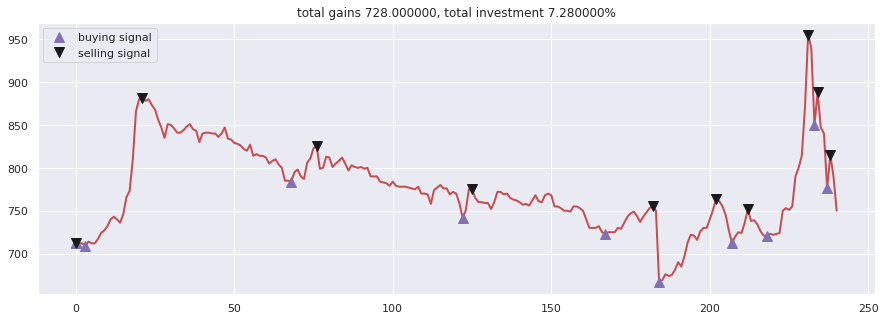

In [564]:
close = nabil['Close']
fig = plt.figure(figsize = (15,5))
plt.plot(close, color='r', lw=2.)
plt.plot(close, '^', markersize=10, color='m', label = 'buying signal', markevery = states_buy)
plt.plot(close, 'v', markersize=10, color='k', label = 'selling signal', markevery = states_sell)
plt.title('total gains %f, total investment %f%%'%((initial_money*invest)/100, invest))
plt.legend()
plt.show()

In [541]:
nabil.shape

(249, 6)

In [540]:
20000*(1.728)

34560.0